### Función para escalonar filas
(programita para triangular matrices)

In [1]:
import numpy as np

def escalonar_filas(M):
    """ 
        Retorna la Matriz Escalonada por Filas 
    """
    A = np.copy(M)
    if (issubclass(A.dtype.type, np.integer)):
        A = A.astype(float)

    # Si A no tiene filas o columnas, ya esta escalonada
    f, c = A.shape
    if f == 0 or c == 0:
        return A

    # buscamos primer elemento no nulo de la primera columna
    i = 0
    
    while i < f and A[i,0] == 0:
        i += 1

    if i == f:
        # si todos los elementos de la primera columna son ceros
        # escalonamos filas desde la segunda columna
        B = escalonar_filas(A[:,1:])
        
        # y volvemos a agregar la primera columna de zeros
        return np.block([A[:,:1], B])


    # intercambiamos filas i <-> 0, pues el primer cero aparece en la fila i
    if i > 0:
        A[[0,i],:] = A[[i,0],:]

    # PASO DE TRIANGULACION GAUSSIANA:
    # a las filas subsiguientes les restamos un multiplo de la primera
    A[1:,:] -= (A[0,:] / A[0,0]) * A[1:,0:1]

    # escalonamos desde la segunda fila y segunda columna en adelante
    B = escalonar_filas(A[1:,1:])

    # reconstruimos la matriz por bloques adosando a B la primera fila 
    # y la primera columna (de ceros)
    return np.block([ [A[:1,:]], [ A[1:,:1], B] ])

In [2]:
# esto es para resolver la practica 1
A = np.array([[1j,-(1+1j),0],[1,-2,1],[1,2j,-1]])
print(A)

[[ 0.+1.j -1.-1.j  0.+0.j]
 [ 1.+0.j -2.+0.j  1.+0.j]
 [ 1.+0.j  0.+2.j -1.+0.j]]


In [3]:
print(escalonar_filas(A))

[[ 0.+1.j -1.-1.j  0.+0.j]
 [ 0.+0.j -1.-1.j  1.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]]


In [4]:
A = np.array([[2,-1+1j,0,1],[-1,3,-3j,5]])
print(A)

[[ 2.+0.j -1.+1.j  0.+0.j  1.+0.j]
 [-1.+0.j  3.+0.j -0.-3.j  5.+0.j]]


In [5]:
print(escalonar_filas(A))

[[ 2. +0.j  -1. +1.j   0. +0.j   1. +0.j ]
 [ 0. +0.j   2.5+0.5j  0. -3.j   5.5+0.j ]]


In [6]:
print(escalonar_filas(A))

[[ 2. +0.j  -1. +1.j   0. +0.j   1. +0.j ]
 [ 0. +0.j   2.5+0.5j  0. -3.j   5.5+0.j ]]


In [7]:
# OJO... puede hacer algunas operaciones de cambios de fila!
A = np.array([[1,2,3,4], [1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(A)

[[ 1  2  3  4]
 [ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [8]:
print(escalonar_filas(A))

[[  1.   2.   3.   4.]
 [  0.  -4.  -8. -12.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]]


In [9]:
A = np.array([[5,3,11],[15,9,33],[20,12,44]])
print(escalonar_filas(A))

[[ 5.  3. 11.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [10]:
A = np.array([[5,3,11],[15,9,33],[20,12,55]])
print(escalonar_filas(A))

[[ 5.  3. 11.]
 [ 0.  0. 11.]
 [ 0.  0.  0.]]


## Parte 2

### Complejidad de la elimación gaussiana (escalonar_filas) experimentalmente

In [11]:
import time

In [12]:
# Matrices con numeros aleatorios
A = np.random.rand(10,10)
print(A)

[[0.99041299 0.27714947 0.75310405 0.77605975 0.43570599 0.05522679
  0.31665007 0.77930024 0.87142164 0.54952449]
 [0.44061101 0.74871791 0.91589481 0.90024297 0.52347157 0.74822588
  0.36716092 0.47536618 0.86117988 0.69349113]
 [0.60991961 0.51372156 0.99997454 0.66394588 0.42066068 0.0391667
  0.28047563 0.76039145 0.33802358 0.14932115]
 [0.75544576 0.21428603 0.20620352 0.82514429 0.5981487  0.89955425
  0.77351303 0.70975424 0.5731794  0.73986944]
 [0.29498498 0.03579884 0.2334449  0.62503958 0.08218005 0.58346182
  0.30017854 0.15910534 0.83561229 0.75159588]
 [0.45069903 0.81600788 0.64090528 0.68731725 0.65743601 0.76858257
  0.44409027 0.79604472 0.50485251 0.56062131]
 [0.24069779 0.43142148 0.84662347 0.69273141 0.32197903 0.18312455
  0.32387525 0.06136165 0.34352694 0.72797686]
 [0.95472632 0.58266782 0.69282552 0.51680018 0.27438334 0.51995705
  0.4819468  0.65370197 0.80948341 0.55045816]
 [0.16182221 0.79468603 0.04962163 0.58821969 0.07313606 0.66277029
  0.91106082 

In [13]:
A = np.random.rand(100,100)
start = time.time()
B = escalonar_filas(A)
end = time.time()
t1 = end - start
print(t1)

0.007568836212158203


In [14]:
A = np.random.rand(200,200)
start = time.time()
B = escalonar_filas(A)
end = time.time()
t2 = end - start
print(t2)

0.043192148208618164


In [15]:
A = np.random.rand(300,300)
start = time.time()
B = escalonar_filas(A)
end = time.time()
t3 = end - start
print(t3)

0.1054844856262207


In [16]:
A = np.random.rand(400,400)
start = time.time()
B = escalonar_filas(A)
end = time.time()
t4 = end - start
print(t4)

0.3024282455444336


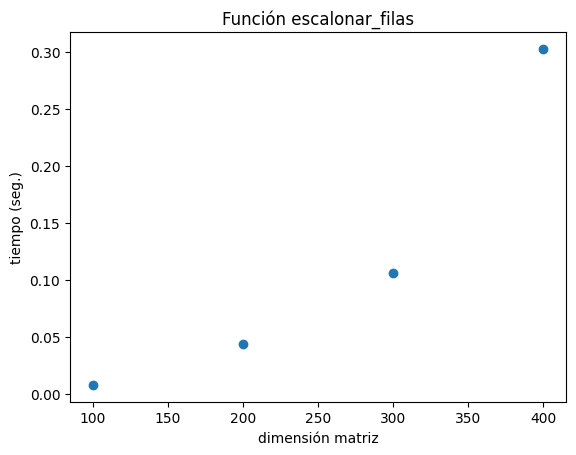

In [19]:
import matplotlib.pyplot as plt
x = np.array([100, 200, 300, 400])
t = np.array([t1, t2, t3, t4])
plt.title("Función escalonar_filas")
plt.xlabel("dimensión matriz")
plt.ylabel("tiempo (seg.)")
plt.scatter(x,t)
plt.show()